# import data

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

In [ ]:
adata = sc.read_10x_mtx('../Data/gastric-cancer-main/00.Processed Data/gcmatrix',)

In [ ]:
meta = pd.read_csv('../Data/gastric-cancer-main/00.Processed Data/cell_metadata.csv')

In [ ]:
meta.index = adata.obs.index

In [ ]:
# 合并列？？

In [ ]:
meta

In [ ]:
adata.obs.Type.value_counts()

In [ ]:
adata.write('../1_Cluster/gc.anndata.h5ad')

# Data process

In [2]:
adata = sc.read_h5ad('../1_Cluster/gc.anndata.h5ad')

In [3]:
sum_type = adata.obs.groupby('Type').count()
sum_type = sum_type.loc[:,['Sample']]
sum_type = sum_type.rename(columns={'Sample':'Total'})
sum_type

,Total
Type,
B,7332
CD4+ T,12905
CD8+ T,31705
Endothelial,3684
Epithelial,7210
Fibroblast,13597
Glial,385
Innate lymphoid,2658
Mast,1340


In [4]:
percent_Type = adata.obs.groupby(['Type','Tissue']).count()[['Sample']]
percent_Type

Sample
Type            Tissue        
B               Normal    1827
                Tumor     5505
CD4+ T          Normal    1002
                Tumor    11903
CD8+ T          Normal   12031
                Tumor    19674
Endothelial     Normal    2261
                Tumor     1423
Epithelial      Normal    5075
                Tumor     2135
Fibroblast      Normal   10508
                Tumor     3089
Glial           Normal     347
                Tumor       38
Innate lymphoid Normal     671
                Tumor     1987
Mast            Normal     560
                Tumor      780
Mural           Normal    1135
                Tumor     1760
Myeloid         Normal    3187
                Tumor     7359
Plasma          Normal    9284
                Tumor     7599

In [5]:
percent_Type = percent_Type.join(sum_type)

In [6]:
percent_Type['percent'] = percent_Type.Sample/percent_Type.Total
percent_Type = percent_Type.reset_index()
percent_Type

,Type,Tissue,Sample,Total,percent
0,B,Normal,1827,7332,0.249182
1,B,Tumor,5505,7332,0.750818
2,CD4+ T,Normal,1002,12905,0.077644
3,CD4+ T,Tumor,11903,12905,0.922356
4,CD8+ T,Normal,12031,31705,0.379467
5,CD8+ T,Tumor,19674,31705,0.620533
6,Endothelial,Normal,2261,3684,0.613735
7,Endothelial,Tumor,1423,3684,0.386265
8,Epithelial,Normal,5075,7210,0.703883
9,Epithelial,Tumor,2135,7210,0.296117


In [50]:
percent_Type

,Type,Tissue,Sample,Total,percent
0,B,Normal,1827,7332,0.249182
1,B,Tumor,5505,7332,0.750818
2,CD4+ T,Normal,1002,12905,0.077644
3,CD4+ T,Tumor,11903,12905,0.922356
4,CD8+ T,Normal,12031,31705,0.379467
5,CD8+ T,Tumor,19674,31705,0.620533
6,Endothelial,Normal,2261,3684,0.613735
7,Endothelial,Tumor,1423,3684,0.386265
8,Epithelial,Normal,5075,7210,0.703883
9,Epithelial,Tumor,2135,7210,0.296117


In [77]:
percent_Type[percent_Type.Tissue == 'Normal'].Type.to_list()

['B',
 'CD4+ T',
 'CD8+ T',
 'Endothelial',
 'Epithelial',
 'Fibroblast',
 'Glial',
 'Innate lymphoid',
 'Mast',
 'Mural',
 'Myeloid',
 'Plasma']

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

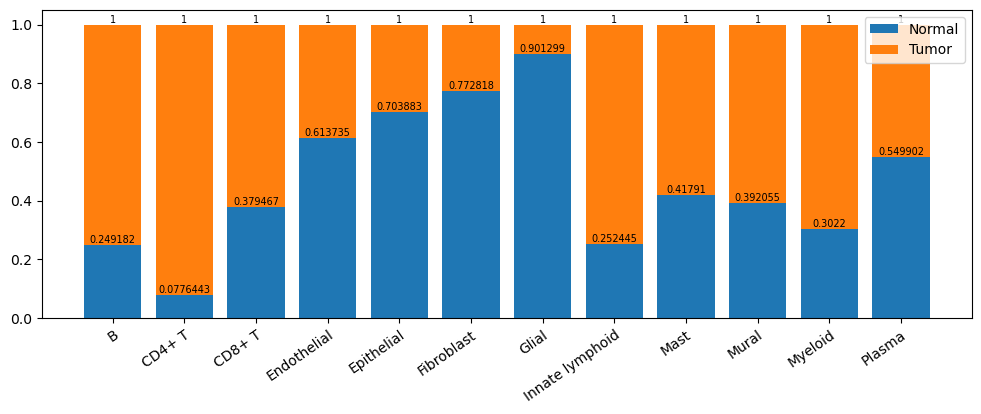

In [117]:
plt.figure(figsize=(12,4))
ax = plt.bar(percent_Type[percent_Type.Tissue == 'Normal'].Type.to_list(), 
             percent_Type[percent_Type.Tissue == 'Normal'].percent.to_list(),label = 'Normal')
bx = plt.bar(percent_Type[percent_Type.Tissue == 'Tumor'].Type.to_list(),
             percent_Type[percent_Type.Tissue == 'Tumor'].percent.to_list(),
             label = 'Tumor', 
             bottom = percent_Type[percent_Type.Tissue == 'Normal'].percent.to_list()
            )

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.bar_label(bx, label_type='edge',fontsize = 7)
plt.bar_label(ax, label_type='edge',fontsize = 7)
plt.legend()
plt.show()

In [118]:
adata.obs

,Sample,Patient,Tissue,Platform,Type,Subtype
AAACCTGAGAGTACCG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P01
AAAGTAGCAAAGGTGC-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACACCGGCACCAGTTA-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACAGCTATCAAAGTAG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACGCCAGAGAGTACCG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P01
...,...,...,...,...,...,...
GCGACCATCAATCTCT-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
GTATCTTTCTGACCTC-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
TACAGTGTCGCAAACT-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
TCGGTAATCATCACCC-1-190124T,190124T,P190124,Tumor,SC5P,B,B12


In [200]:
cluster_sum_in_patient = adata.obs.groupby(['Type','Patient']).count()[['Sample']]
cluster_sum_in_patient=cluster_sum_in_patient.rename(columns={'Sample':'Total'})
cluster_sum_in_patient

Total
Type   Patient       
B      P171012    742
       P171116     28
       P171218    235
       P180116     56
       P180118    322
...               ...
Plasma P190103   1778
       P190118    719
       P190123    435
       P190124   3050
       P190125    360

[288 rows x 1 columns]

In [201]:
a = adata.obs.groupby(['Type','Patient','Tissue']).count().reset_index()
a

,Type,Patient,Tissue,Sample,Platform,Subtype
0,B,P171012,Normal,1,1,1
1,B,P171012,Tumor,741,741,741
2,B,P171116,Normal,17,17,17
3,B,P171116,Tumor,11,11,11
4,B,P171218,Normal,205,205,205
...,...,...,...,...,...,...
571,Plasma,P190123,Tumor,292,292,292
572,Plasma,P190124,Normal,1559,1559,1559
573,Plasma,P190124,Tumor,1491,1491,1491
574,Plasma,P190125,Normal,1,1,1


In [202]:
norm = a[a.Tissue == 'Normal']
norm.index = np.arange(norm.shape[0])
norm

,Type,Patient,Tissue,Sample,Platform,Subtype
0,B,P171012,Normal,1,1,1
1,B,P171116,Normal,17,17,17
2,B,P171218,Normal,205,205,205
3,B,P180116,Normal,28,28,28
4,B,P180118,Normal,248,248,248
...,...,...,...,...,...,...
283,Plasma,P190103,Normal,1631,1631,1631
284,Plasma,P190118,Normal,70,70,70
285,Plasma,P190123,Normal,143,143,143
286,Plasma,P190124,Normal,1559,1559,1559


In [203]:
tumor = a[a.Tissue == 'Tumor']
tumor.index = np.arange(tumor.shape[0])
tumor

,Type,Patient,Tissue,Sample,Platform,Subtype
0,B,P171012,Tumor,741,741,741
1,B,P171116,Tumor,11,11,11
2,B,P171218,Tumor,30,30,30
3,B,P180116,Tumor,28,28,28
4,B,P180118,Tumor,74,74,74
...,...,...,...,...,...,...
283,Plasma,P190103,Tumor,147,147,147
284,Plasma,P190118,Tumor,649,649,649
285,Plasma,P190123,Tumor,292,292,292
286,Plasma,P190124,Tumor,1491,1491,1491


In [ ]:
cluster_sum_in_patient['percent_of_norm'] = norm.sample/

In [168]:
norm.Sample/tumor.Sample

0       0.001350
1       1.545455
2       6.833333
3       1.000000
4       3.351351
         ...    
283    11.095238
284     0.107858
285     0.489726
286     1.045607
287     0.002786
Name: Sample, Length: 288, dtype: float64

In [204]:
cluster_sum_in_patient = cluster_sum_in_patient.reset_index()
cluster_sum_in_patient['normal_percent'] = norm.Sample/cluster_sum_in_patient.Total
cluster_sum_in_patient['tumor_percent'] = tumor.Sample/cluster_sum_in_patient.Total
cluster_sum_in_patient['ratio'] =norm.Sample/tumor.Sample
cluster_sum_in_patient

,Type,Patient,Total,normal_percent,tumor_percent,ratio
0,B,P171012,742,0.001348,0.998652,0.001350
1,B,P171116,28,0.607143,0.392857,1.545455
2,B,P171218,235,0.872340,0.127660,6.833333
3,B,P180116,56,0.500000,0.500000,1.000000
4,B,P180118,322,0.770186,0.229814,3.351351
...,...,...,...,...,...,...
283,Plasma,P190103,1778,0.917323,0.082677,11.095238
284,Plasma,P190118,719,0.097357,0.902643,0.107858
285,Plasma,P190123,435,0.328736,0.671264,0.489726
286,Plasma,P190124,3050,0.511148,0.488852,1.045607


In [271]:
mean = cluster_sum_in_patient.groupby('Type').agg({'ratio':'mean'})


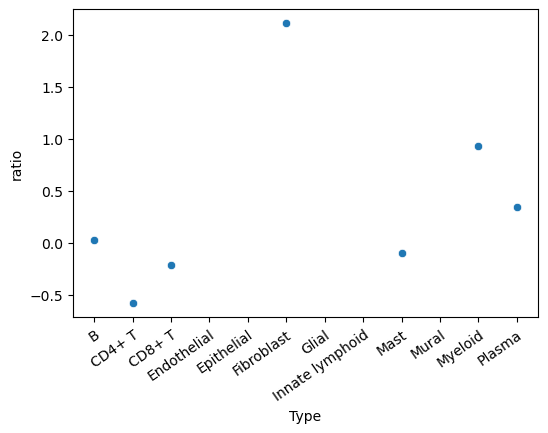

In [272]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=mean.index,
            y=np.log10(mean.ratio))

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.show()